# Lecture 23

Digital signal processing and wrap-up

4/20/2023

## Announcements

- Final draft of the papers is due tomorrow evening. (One submission per group.)
- Each student must also submit an individual reflection describing your contribution to the project.
- Midterm Exam 4 is Tuesday in class
  - Topics: Architectural Acoustics, Analog and Digital Recording

## Review

- Sampling processes
  - Nyquist frequency/rate
  - Bit depth

In [1]:
from pathlib import Path
import IPython.display as ipd
import librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
audiopath = Path('/home/corcoted/Downloads/vibrato/Take 1')
audiofile = audiopath / "Sax Take 1b.wav"

In [3]:
audio_wf, audio_sr = librosa.load(audiofile,  mono=True, offset=3.0, duration=1.0, sr=None) #keep original sample rate, but mono (sr=N

In [4]:
audio_dt = 1./audio_sr
audio_dt

1.0416666666666666e-05

In [9]:
audio_T=audio_wf.shape[0]/audio_sr

In [37]:
print(audio_wf[10:0:-1])


[0.01998746 0.02151501 0.0228157  0.02389419 0.02475274 0.0254091
 0.02590322 0.02631068 0.02665734 0.02694833]


In [97]:
def moving_average(a, n=3, wrap=False) :
    if wrap:
        length_a = a.shape[0]
        mid_a = np.concatenate((a[n:0:-1],a,(a[-n:])[n:0:-1])) # pad by wrapping
        ret = np.cumsum(mid_a, dtype=float)
        ret[n:] = ret[n:] - ret[:-n]
        return ret[n-1:-n] / n #remove wrap
    else:
        ret = np.cumsum(a, dtype=float)
        ret[n:] = ret[n:] - ret[:-n]
        return ret[n - 1:] / n

def envelope(data, width):
    '''return the envelope'''
    data_mean = np.mean(data)
    return np.sqrt(2*moving_average((data-data_mean)**2,width,True))+data_mean

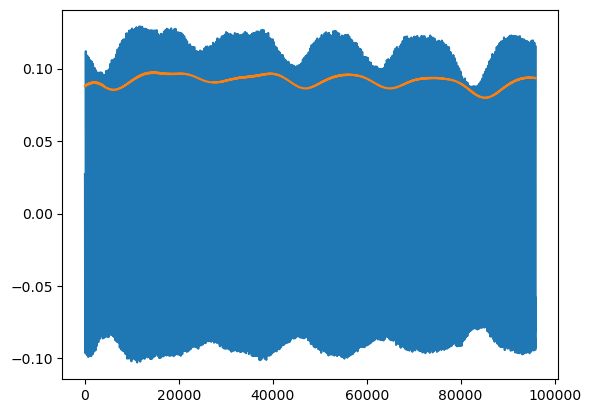

In [101]:
plt.plot(audio_wf)
plt.plot(envelope(audio_wf,4000))

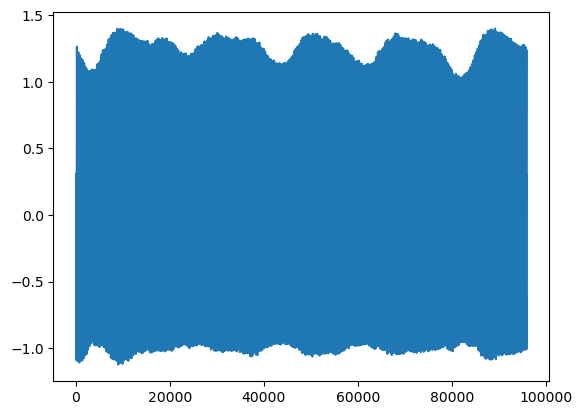

In [102]:
plt.plot(audio_wf/envelope(audio_wf,4000))

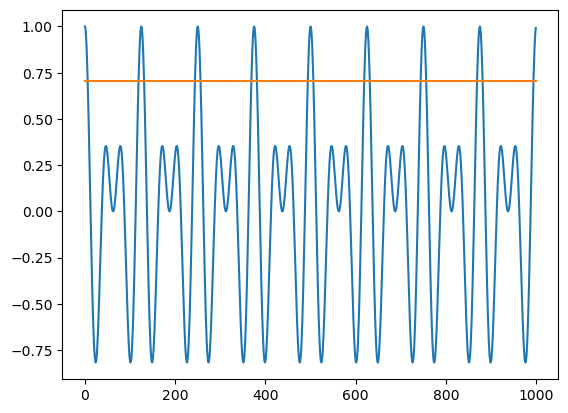

In [100]:
plt.plot((np.cos(2*np.pi*np.arange(1000)/250.)*np.cos(2*np.pi*np.arange(1000)/50.)))
plt.plot(envelope(np.cos(2*np.pi*np.arange(1000)/250.)*np.cos(2*np.pi*np.arange(1000)/50.),500))